Importamos las librerias que usaremos e importamos el conjunto de datos

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# Modulos para escalonado 
from sklearn.preprocessing import scale, MinMaxScaler

### 1. Descripcion del conjunto de datos

### 2. Analisis exploratorio

### 3. Tratamiento de datos atipicos

### **Reduccion de dimensiones**

In [32]:
columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'DEATH_EVENT']
heart_df = pd.read_csv('heart_failure_clinical_records_dataset.csv', usecols= columns)

**Matriz de correlacion**

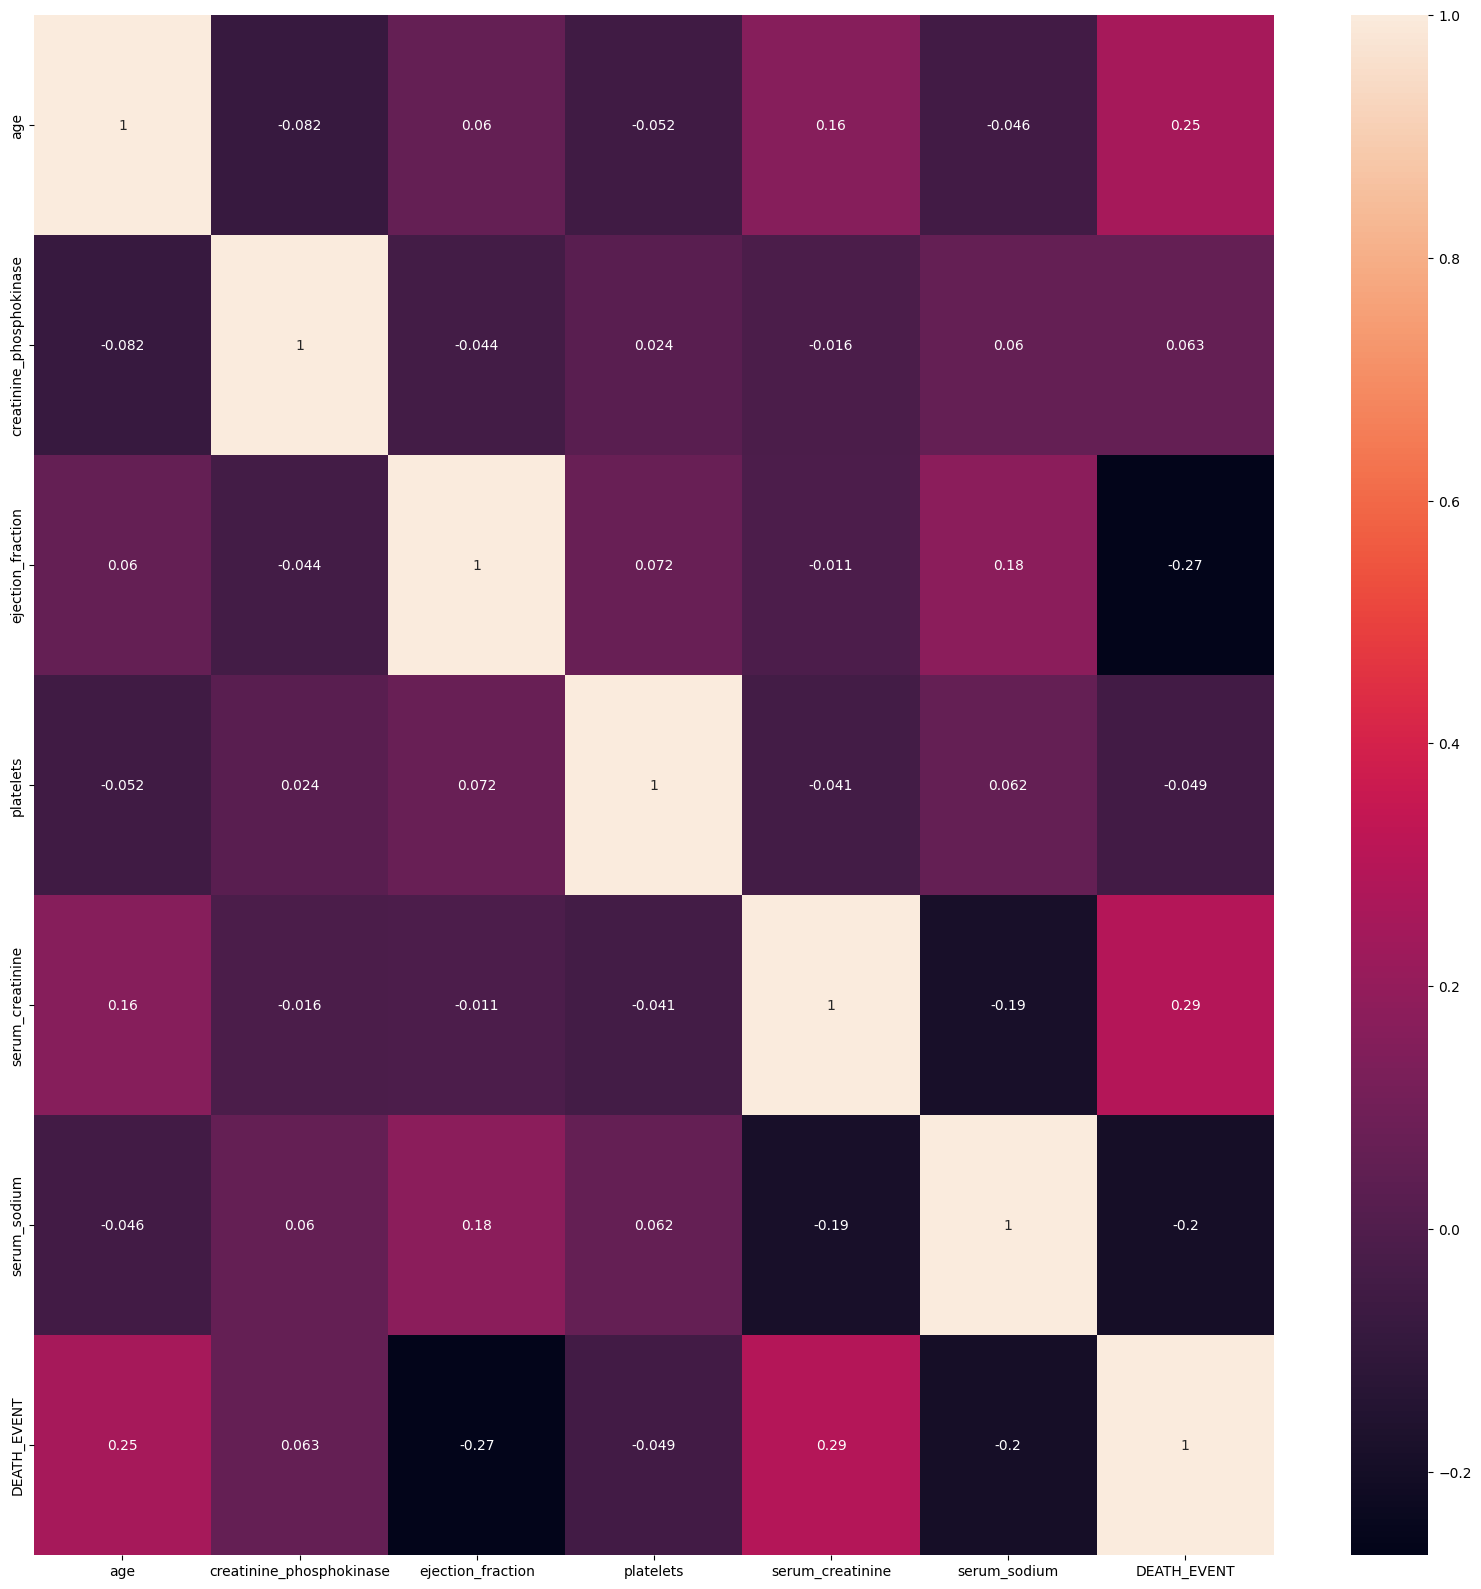

In [4]:
corr_data = heart_df.corr()

plt.figure(figsize= (20,20))
sns.heatmap(corr_data, fmt='.2g', annot= True)
plt.show()

No se elimina ninguna variables porque no existe una correlacion fuerte entre ellas, igualmente se puede evidenciar esto en el grafico de barras que realizamos posteriormente con las variables estandarizadas, demostrando asi que cada variable suministra informacion valiosa

**Estandarizacion de variables**

In [5]:
scaler =StandardScaler()
df_estand = scaler.fit_transform(heart_df)
df_estand = pd.DataFrame(df_estand, columns=heart_df.columns)

pca = PCA(n_components= 7) # Numero 7 por el numero de variables
data_pca = pca.fit_transform(df_estand)

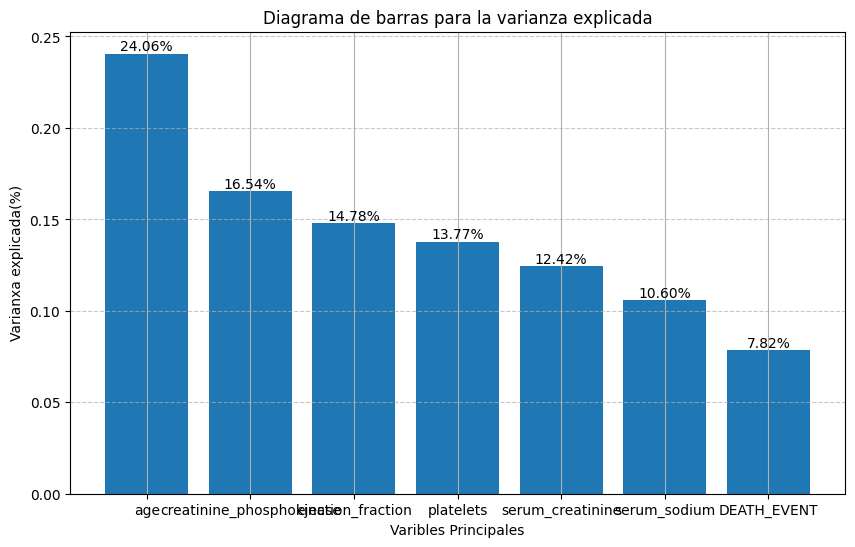

In [27]:
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize= (10,6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Varibles Principales')
plt.ylabel('Varianxa explicada(%)')
plt.title('Diagrama de barras para la varianza explicada')
plt.xticks(range(1,8), columns)
plt.grid(True)

# Para poner el label en cada barra
for i, ratio in enumerate(explained_variance):
    plt.text(i + 1, ratio, f'{ratio:.2%}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show() 

In [30]:
data_pca = pd.DataFrame(data_pca, columns= columns)
data_pca

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,DEATH_EVENT
0,2.636087,0.481736,-0.055057,0.403632,-0.729775,-0.662050,0.254990
1,0.474593,3.862572,5.219342,-2.854949,1.899451,-2.153478,-0.380228
2,2.363040,0.978129,-1.257243,-0.020346,-0.503538,-0.584041,-0.385591
3,1.351887,1.225824,-0.553656,0.034797,-0.454394,1.379707,-0.569019
4,3.952849,1.021145,-0.992056,2.597876,0.965151,-1.837876,0.082067
...,...,...,...,...,...,...,...
294,-0.913537,-0.440570,-0.723542,-1.248903,-0.480557,0.846688,0.344380
295,-0.921622,0.775115,0.769665,-0.523307,0.423986,-0.051897,0.423922
296,-2.745846,0.129687,3.593164,3.303854,0.513354,-0.702372,-0.582345
297,-0.999044,1.497449,0.417228,-1.676148,1.262801,0.396212,0.178582


### **Clusterizacion**

### preparacion de los datos para el clustering

In [8]:
rip_heart_df = heart_df[heart_df['DEATH_EVENT'] == 1]
alive_heart_df = heart_df[heart_df['DEATH_EVENT'] == 0]

rip_heart_df.drop(['DEATH_EVENT'], axis=1, inplace=True)
alive_heart_df.drop(['DEATH_EVENT'], axis=1, inplace=True)

C:\Users\Josue Paniagua Lopez\AppData\Local\Temp\ipykernel_20384\2200782813.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rip_heart_df.drop(['DEATH_EVENT'], axis=1, inplace=True)
C:\Users\Josue Paniagua Lopez\AppData\Local\Temp\ipykernel_20384\2200782813.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alive_heart_df.drop(['DEATH_EVENT'], axis=1, inplace=True)


In [9]:
rip_heart_df

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,75.0,582,20,265000.00,1.90,130
1,55.0,7861,38,263358.03,1.10,136
2,65.0,146,20,162000.00,1.30,129
3,50.0,111,20,210000.00,1.90,137
4,65.0,160,20,327000.00,2.70,116
...,...,...,...,...,...,...
220,73.0,582,20,263358.03,1.83,134
230,60.0,166,30,62000.00,1.70,127
246,55.0,2017,25,314000.00,1.10,138
262,65.0,258,25,198000.00,1.40,129


In [10]:
alive_heart_df

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
14,49.0,80,30,427000.0,1.0,138
20,65.0,52,25,276000.0,1.3,137
23,53.0,63,60,368000.0,0.8,135
33,50.0,159,30,302000.0,1.2,138
38,60.0,2656,30,305000.0,2.3,137
...,...,...,...,...,...,...
294,62.0,61,38,155000.0,1.1,143
295,55.0,1820,38,270000.0,1.2,139
296,45.0,2060,60,742000.0,0.8,138
297,45.0,2413,38,140000.0,1.4,140


A continuacion normalizamos los datos con la finalidad de ponerlos todos en una misma escala evitando asi que una sola variable cargue con toda la informacion 

In [31]:
# scale
scaled_1 = scale(heart_df) # Z-score

# MinMaxScaler
scaler = MinMaxScaler()
scaled_2 = scaler.fit_transform(heart_df)
scaled_1

array([[ 1.19294523e+00,  1.65728387e-04, -1.53055953e+00, ...,
         4.90056987e-01, -1.50403612e+00,  1.45416070e+00],
       [-4.91279276e-01,  7.51463953e+00, -7.07675018e-03, ...,
        -2.84552352e-01, -1.41976151e-01,  1.45416070e+00],
       [ 3.50832977e-01, -4.49938761e-01, -1.53055953e+00, ...,
        -9.09000174e-02, -1.73104612e+00,  1.45416070e+00],
       ...,
       [-1.33339153e+00,  1.52597865e+00,  1.85495776e+00, ...,
        -5.75030855e-01,  3.12043840e-01, -6.87681906e-01],
       [-1.33339153e+00,  1.89039811e+00, -7.07675018e-03, ...,
         5.92615005e-03,  7.66063830e-01, -6.87681906e-01],
       [-9.12335403e-01, -3.98321274e-01,  5.85388775e-01, ...,
         1.99578485e-01, -1.41976151e-01, -6.87681906e-01]])

### Algoritmo K-medias, Entrenamiento del modelo

Realizamos el metodo del codo para determinar cual es el numero de clusters adecuados

C:\Users\Josue Paniagua Lopez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Josue Paniagua Lopez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Josue Paniagua Lopez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

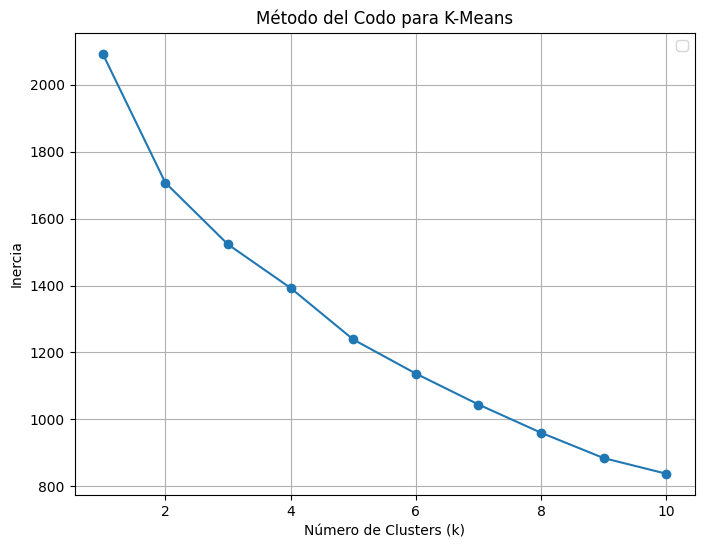

In [33]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_1)
    inertia.append(kmeans.inertia_) 

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para K-Means')

plt.grid()
plt.legend()
plt.show()

El metodo del codo no nos dice ninguna informacion valiosa por comom podemos observar entonces nos guiaremos de la teoria, defiendo el numero de clusters igual a 2 por ser los valores que debemos obtener

In [13]:
# Por defecto usa la distancia euclidea
km = KMeans(
    n_clusters = 2, init='random',
    n_init=10, random_state=0
)

In [15]:
y_km = km.fit_predict(scaled_1)
y_km

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

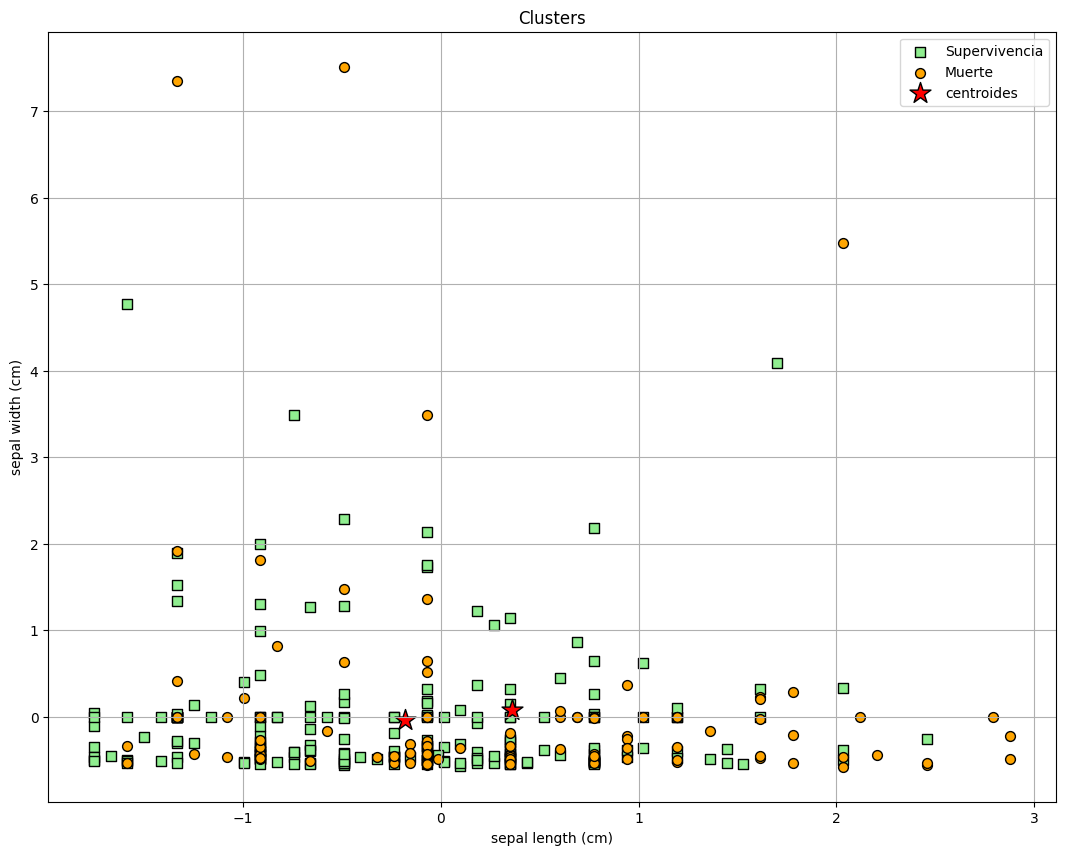

In [35]:
#configuro el tamaño del grafico final
plt.figure(figsize=(13,10))

columna_1 = 0
columna_2 = 1

#scatter del primer cluster
plt.scatter(
    scaled_1[y_km == 0, columna_1], scaled_1[y_km == 0, columna_2], #0,0 hace una máscara de los datos que pertenecen al cluster 0 de la primera columna y 0,1 lo mismo pero para la segunda columna
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='Supervivencia'
)
#scatter del segundo cluster
plt.scatter(
    scaled_1[y_km == 1, columna_1], scaled_1[y_km == 1, columna_2],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='Muerte'
)

#scatter del los centroides
plt.scatter(
    km.cluster_centers_[:, columna_1], km.cluster_centers_[:, columna_2],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroides'
)
plt.legend()
plt.grid()
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Clusters')
plt.show()

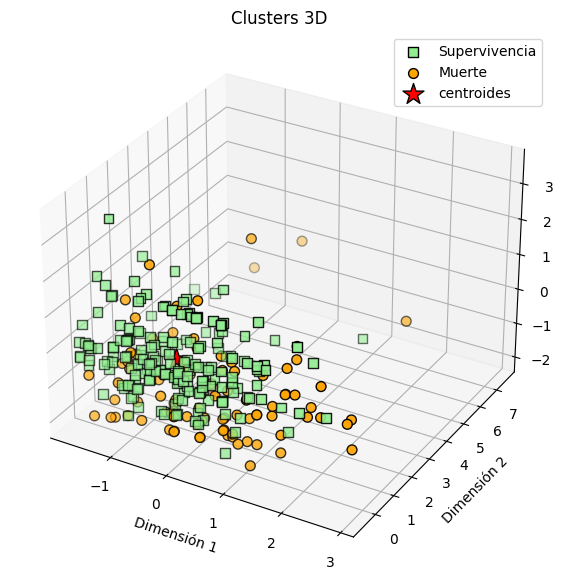

In [28]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

columna_1 = 0
columna_2 = 1
columna_3 = 2  # Asegúrate de que tienes una tercer columna en tu matriz de datos.

ax.scatter(
    scaled_1[y_km == 0, columna_1], scaled_1[y_km == 0, columna_2], scaled_1[y_km == 0, columna_3],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='Supervivencia'
)

ax.scatter(
    scaled_1[y_km == 1, columna_1], scaled_1[y_km == 1, columna_2], scaled_1[y_km == 1, columna_3],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='Muerte'
)

ax.scatter(
    km.cluster_centers_[:, columna_1], km.cluster_centers_[:, columna_2], km.cluster_centers_[:, columna_3],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroides'
)

ax.set_xlabel('Dimensión 1')
ax.set_ylabel('Dimensión 2')
ax.set_zlabel('Dimensión 3')
ax.set_title('Clusters 3D')
plt.legend()
plt.grid()
plt.show()


Text(0.5, 23.52222222222222, 'Valores reales')

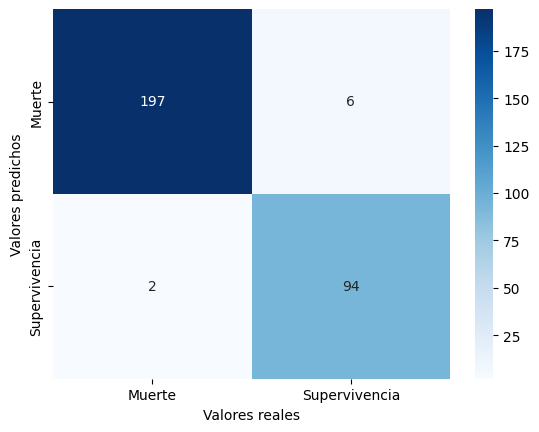

In [20]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

matriz_confusion = confusion_matrix(heart_df['DEATH_EVENT'], y_km)

# Heatmap
sns.heatmap(matriz_confusion, annot= True, fmt= 'd', cmap= 'Blues',
            xticklabels= ['Muerte', 'Supervivencia'],
            yticklabels= ['Muerte', 'Supervivencia'])

plt.ylabel('Valores predichos')
plt.xlabel('Valores reales')

In [36]:
# Calcular la precisión del modelo
precision = precision_score(heart_df['DEATH_EVENT'], y_km)
# Calcular la exactitud
exactitud = accuracy_score(heart_df['DEATH_EVENT'], y_km)
# Calcular el recall
recall = recall_score(heart_df['DEATH_EVENT'], y_km)
# Calcular el F1-score
f1 = f1_score(heart_df['DEATH_EVENT'], y_km)


print(f'Exactitud: {exactitud:.2f}')
print(f'Precisión: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Exactitud: 0.97
Precisión: 0.94
Recall: 0.98
F1-score: 0.96


Como podemos observar la precision del modelo es bastante alta

### Clustering Jerarquico

In [38]:
H = linkage(scaled_1, 'single')

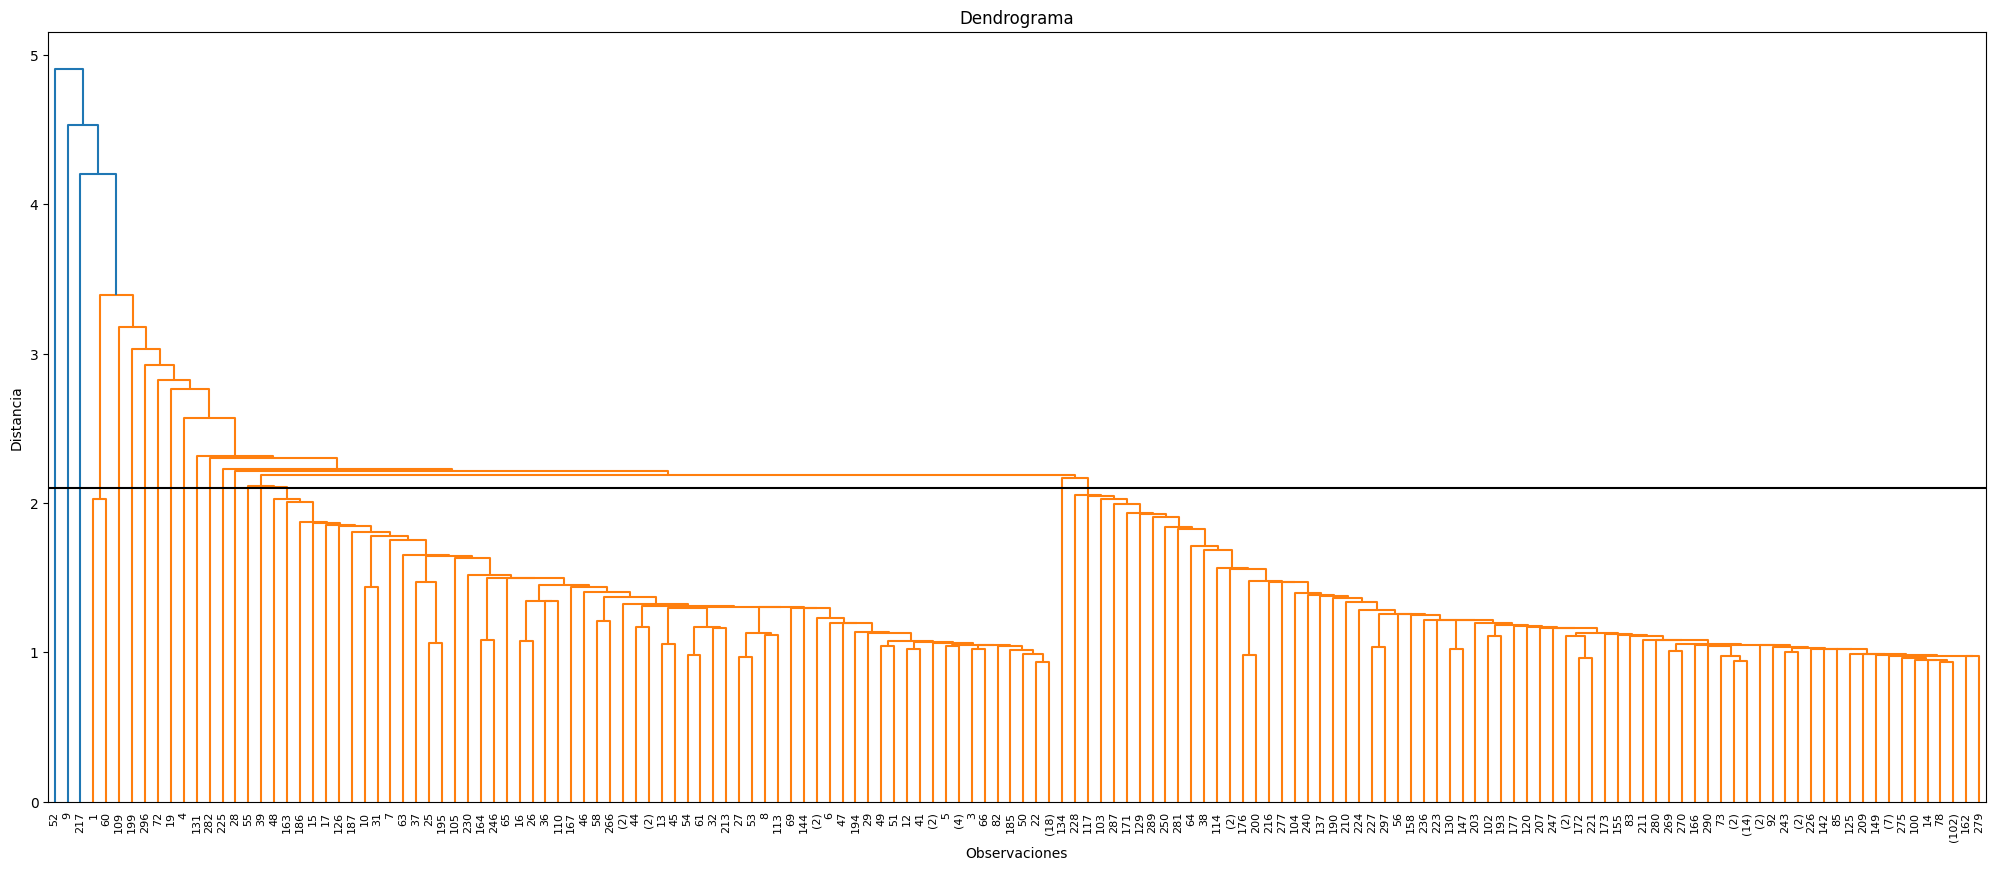

In [44]:
max_d = 2.1
plt.figure(figsize=(25, 10))
plt.title('Dendrograma')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
dendrogram(
    H, truncate_mode='lastp',
    p=150, leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.axhline(y=max_d, c='k')
plt.show()

### **Modelo predictiva**

### **Resultados y evaluacion del modelo**